In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Archivo LES (experimento)

In [2]:
nombres=np.loadtxt('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',dtype='U',max_rows=1,skiprows=2,delimiter='\t')
nombres[0]='fecha'
nombres[1]='hora'
nombres[3]='Ti'
nombres[7]='To'
nombres[5]='Tg'
nombres[8]='Tsi_SC'
nombres[9]='Tso_SC'
LES=pd.read_csv('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',names=nombres,sep='\t',skiprows=3)
LES.hora = LES.hora.str.replace('p. m.','PM',regex=True)
LES.hora = LES.hora.str.replace('a. m.','AM',regex=True)
LES['time']=LES.fecha+ ' ' +LES.hora
LES.time= pd.to_datetime(LES.time,dayfirst=True)
LES.set_index('time',inplace=True)
del LES['fecha']
del LES['hora']
upsampled     = LES.resample('1Min').pad()
LES= upsampled.interpolate(method='time')
LES=LES.drop(LES.index[0])

### Archivo ener-habitat (usando el programa ener-habitat)

In [3]:
EH = pd.read_csv('../Datos/agaa._1_18_Nu10000_ho13.00.csv',sep='\t')
EH = EH.drop([0], axis=0)
EH['#t']= EH['#t'].str.replace('.17',':10',regex=True)
EH['#t']= EH['#t'].str.replace('.33',':20',regex=True)
EH['#t']= EH['#t'].str.replace('.50',':30',regex=True)
EH['#t']= EH['#t'].str.replace('.67',':40',regex=True)
EH['#t']= EH['#t'].str.replace('.83',':50',regex=True)
EH['#t']= EH['#t'].str.replace('24.00','23:59',regex=True)
EH['#t']= EH['#t'].str.replace('.',':',regex=True)
EH['tiempo']= '2019 02/01' +' '+ EH['#t']
EH['tiempo']
EH['tiempo']= pd.to_datetime(EH['tiempo'])
EH.set_index(EH.tiempo,inplace=True)
EH['Tsa'] = EH.Tsa.astype(float)
EH['Ta'] = EH.Ta.astype(float)
EH['Tparedint'] = EH.Tparedint.astype(float)
EH['Tint'] = EH.Tint.astype(float)
EH['Tsa'] = EH.Tsa.astype(float)

### Archivo IDF (simulacion de LES con condiciones de ener-habitat)

In [3]:
nombres= np.loadtxt('../Datos/LES_enerhabitat.txt',dtype='U',max_rows=1,delimiter=',')
nombres[0]='tiempo'
nombres[1]='Ti_IDF'
nombres[2]='Ta_IDF'
nombres[19]='Ti_guarda'

archivo = '../Datos/LES_enerhabitat.txt'
def importa(archivo,nombres):
    IDF= pd.read_csv(archivo,names=nombres,skiprows=1)
    IDF.tiempo= IDF.tiempo.str.replace('24:00:00','23:59:59')
    IDF.tiempo= '2019'+' '+ IDF.tiempo
    IDF.tiempo= pd.to_datetime(IDF.tiempo,format='%Y %m/%d %H:%M:%S')
    start_date = '2019 01/01'
    end_date   = '2019 02/02'
    IDF= IDF.loc[(IDF['tiempo'] > start_date) & (IDF['tiempo'] <= end_date)]
    IDF.set_index(IDF.tiempo,inplace=True)
    upsampled= IDF.resample('1Min').pad()
    IDF= upsampled.interpolate(method='time')
    IDF= upsampled.interpolate(method='time')
    del IDF['tiempo']
    return IDF
IDF = importa('../Datos/LES_enerhabitat.txt',nombres)

#### Muro opuesto con masa termica

In [5]:
Mopuesto = importa('../Datos/LES_enerhabitat_Mopuesto.txt',nombres)

### IDF LES simplificacdo (cubo)

In [6]:
nombres2= np.loadtxt('../Datos/eh_simplificado_LES.txt',dtype='U',max_rows=1,delimiter=',')
nombres2[0]='tiempo'
nombres2[1]='To_cubo'
nombres2[2]='Ti_cubo'

cubo_LES = importa('../Datos/eh_simplificado_LES.txt',nombres2)

In [7]:
Mopuesto_simplificado= importa ('../Datos/eh_simplificado_LES_Mopuesto.txt',nombres)

In [8]:
dt=IDF.index-LES.index
LES.index=LES.index+dt

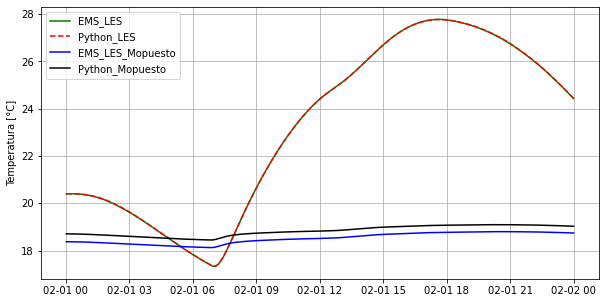

In [14]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.ylabel('Temperatura [°C]')
#plt.title("IDF en condiciones de ener-habitat")



#ax.plot(LES.Ti, 'm', label   = 'LES')

ax.plot(IDF.Ti_IDF, 'g', label   = 'EMS_LES')
ax.plot(LES_python.Thabitacion, 'r--', label   = 'Python_LES')
#ax.plot(cubo_LES.Ti_cubo, 'k--', label   = 'EP_simplificado')

ax.plot(Mopuesto.Ti_IDF, 'b', label   = 'EMS_LES_Mopuesto')
ax.plot(python_Mopuesto.Thabitacion, 'k', label   = 'Python_Mopuesto')


#ax.plot(cubo_LES.To_cubo, 'c', label   = 'To')



plt.grid()
ax.legend()


In [4]:
nombres3= np.loadtxt('../Datos/LES_python.txt',dtype='U',max_rows=1,delimiter=',')
nombres3[0]='tiempo'
nombres3[1]='To'
nombres3[2]='TClima'
nombres3[3]='TGuarda'
nombres3[4]='Thabitacion'
nombres3

array(['tiempo', 'To', 'TClima', 'TGuarda', 'Thabitacion'], dtype='<U62')

<AxesSubplot:xlabel='tiempo'>

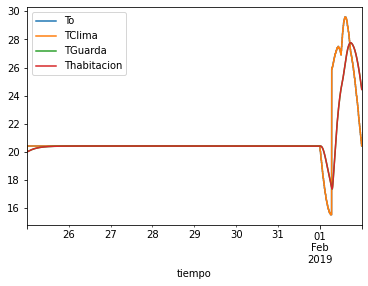

In [5]:
LES_python = importa('../Datos/LES_python.txt',nombres3)
LES_python.plot()

In [44]:
python_muros = importa('../IDF/LES_python/LES_python_Muros.csv',nombres3)

<AxesSubplot:xlabel='tiempo'>

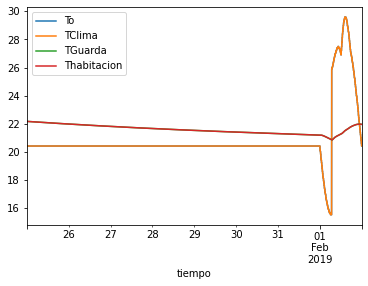

In [45]:
python_muros.plot()

<AxesSubplot:xlabel='tiempo'>

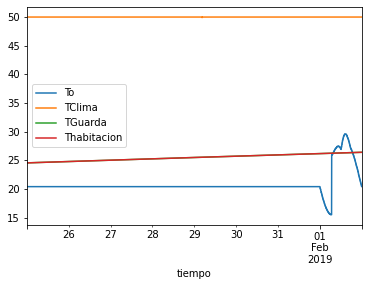

In [26]:
python_Mopuesto.plot()

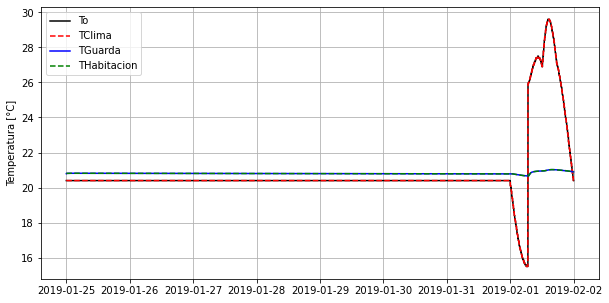

In [19]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.ylabel('Temperatura [°C]')
#plt.title("IDF en condiciones de ener-habitat")

ax.plot(python_Mopuesto.To, 'k', label   = 'To')
ax.plot(python_Mopuesto.TClima, 'r--', label   = 'TClima')
ax.plot(python_Mopuesto.TGuarda, 'b', label   = 'TGuarda')
ax.plot(python_Mopuesto.Thabitacion, 'g--', label   = 'THabitacion')


plt.grid()
ax.legend()